<a href="https://colab.research.google.com/github/CristianoDataScience/Analise-Estat-stica-Enem_2019/blob/main/Teste_mann_whitney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TESTE MANN WHITNEY (soma de postos de Wilcoxon)**

#### Teste Não paramétrico
#### Duas amostras independentes

In [1]:
import numpy as np
import pandas as pd

In [3]:
enem_sp = pd.read_csv('/content/drive/MyDrive/curso estatistica/enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')
enem_sp.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,nao_respondeu,NaN,...,600.2,Ingles,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Ingles,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Nao
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,publica,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,publica,NaN,...,419.2,Ingles,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,nao_respondeu,NaN,...,796.1,Ingles,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


Objetivo: Analisar a diferença entre as medianas de mulheres e homens para a nota de um dos componentes de redação do colégio x.

In [4]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]

In [5]:
colegiox.shape

(41, 28)

In [6]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,publica,35017632.0,...,537.1,Ingles,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,publica,35017632.0,...,451.9,Ingles,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Nao
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,publica,35017632.0,...,506.4,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Nao
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,publica,35017632.0,...,59.5,Ingles,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,publica,35017632.0,...,510.6,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim


In [7]:
colegiox_mulher = colegiox.loc[colegiox.SEXO == 'F']

In [8]:
colegiox_mulher.shape

(28, 28)

In [9]:
colegiox_homem = colegiox.loc[colegiox.SEXO == 'M']

In [10]:
colegiox_homem.shape

(13, 28)

1) Analisar a classificação das variáveis

In [11]:
colegiox.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

2) Analisar valores missing

In [12]:
colegiox.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

3) Analisar Normalidade

### Critérios:

##### Nível de significância de 0,05 ou 5% (Mais utilizado)

##### Quando p > 0,05 (Distribuição normal)

In [14]:
import scipy.stats as stats
import matplotlib.pyplot as plt


In [15]:
# Teste Shapiro-Wilk
stats.shapiro(colegiox_mulher.NOTA_MT)

ShapiroResult(statistic=0.7194502353668213, pvalue=5.43060059499112e-06)

In [16]:
# Teste Shapiro-Wilk
stats.shapiro(colegiox_homem.NOTA_MT)

ShapiroResult(statistic=0.8659597635269165, pvalue=0.04620101675391197)

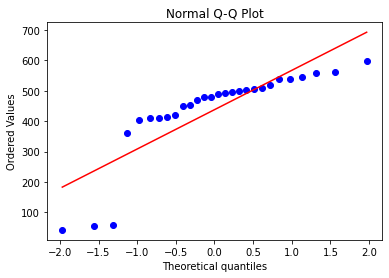

In [18]:
stats.probplot(colegiox_mulher['NOTA_MT'], dist='norm', plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

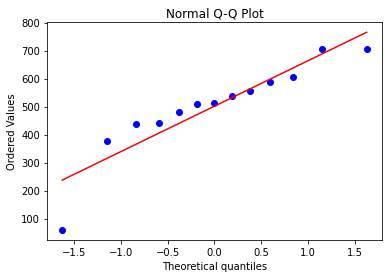

In [19]:
stats.probplot(colegiox_homem['NOTA_MT'], dist='norm', plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

In [20]:
# Teste Shapiro-Wilk
stats.shapiro(colegiox_mulher.NOTA_CN)

ShapiroResult(statistic=0.7065989375114441, pvalue=3.5363013921596576e-06)

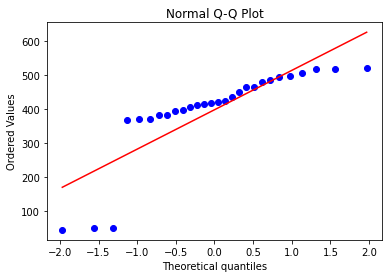

In [22]:
stats.probplot(colegiox_mulher['NOTA_CN'], dist='norm', plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

In [21]:
# Teste Shapiro-Wilk
stats.shapiro(colegiox_homem.NOTA_CN)

ShapiroResult(statistic=0.7647998332977295, pvalue=0.0026814276352524757)

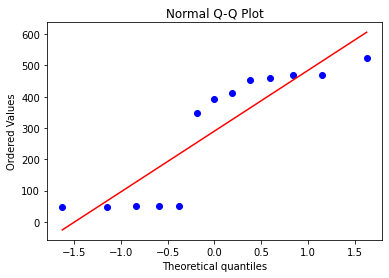

In [23]:
stats.probplot(colegiox_homem['NOTA_CN'], dist='norm', plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

## Teste MANN WHITNEY

#### Comparação das medianas das notas homens e mulheres do colegio x.

##### Ho = NÃO HÁ DIFERENÇA ENTRE AS MÉDIAS DE HOMENS E MULHRES: p > 0.05
###### Ha = HÁ DIFERENÇA ENTRE AS MÉDIAS DE HOMENS E MULHRES: p <= 0.05

In [24]:
stat, p = stats.mannwhitneyu(colegiox_mulher.NOTA_MT, colegiox_homem.NOTA_MT)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: 127.0
p-valor: 0.12678483629218537


In [25]:
stat, p = stats.mannwhitneyu(colegiox_mulher.NOTA_CN, colegiox_homem.NOTA_CN)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: 228.0
p-valor: 0.20239601597295886


In [26]:
colegiox_mulher.NOTA_MT.describe()

count     28.000000
mean     437.928571
std      146.875707
min       42.400000
25%      413.375000
50%      485.150000
75%      512.550000
max      599.500000
Name: NOTA_MT, dtype: float64

In [27]:
colegiox_homem.NOTA_MT.describe()

count     13.000000
mean     501.515385
std      164.496808
min       59.500000
25%      442.600000
50%      513.900000
75%      588.800000
max      705.700000
Name: NOTA_MT, dtype: float64

In [28]:
colegiox_mulher.NOTA_CN.describe()

count     28.000000
mean     397.785714
std      132.791189
min       43.400000
25%      381.875000
50%      420.300000
75%      480.275000
max      521.600000
Name: NOTA_CN, dtype: float64

In [29]:
colegiox_homem.NOTA_CN.describe()

count     13.000000
mean     290.130769
std      202.857069
min       46.300000
25%       49.800000
50%      391.500000
75%      460.200000
max      523.100000
Name: NOTA_CN, dtype: float64

In [30]:
import plotly.express as px

In [31]:
grafico = px.box(colegiox, x = 'SEXO', y = 'NOTA_MT')
grafico.show()

In [32]:
grafico = px.box(colegiox, x = 'SEXO', y = 'NOTA_CN')
grafico.show()

**Conclusão:** Estatisticamente, com intervalor de confiança de 95%, não se pode concluir que a mediana das notas de matemática e ciências da natureza do colegio X sejam diferentes entre homens e mulheres.

